In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### loading node2vec embeddings

In [5]:
with open('gae/data/saved/node2vec/disease_weighted.emb') as f:
    embeddings = f.readlines()[1:]

In [6]:
embeddings.sort(key=lambda l: int(l.replace('\n', '').split(' ')[0]))

In [7]:
embeddings = [[float(n) for n in l.split(' ')] for l in embeddings]

In [8]:
node_list = [e[0] for e in embeddings]
embeddings = [e[1:] for e in embeddings]

In [9]:
embedding_matrix = np.stack(embeddings)
embedding_matrix.shape

(516, 16)

### loading gmvae embeddings

In [10]:
z = np.load('gae/data/saved/disease_network_z.npy')
z.shape

(516, 16)

In [11]:
with open('gae/data/diseasome/node_list.txt') as f: 
    node_order = f.readlines()

In [12]:
node_order = [int(n.replace('\n', '')) for n in node_order]

In [13]:
# sorted z 
z = np.stack(sorted(zip(node_order, z.tolist()), key=lambda x: x[0]))

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [14]:
z = np.stack(list(zip(*z))[1])

### Dataframe

In [18]:
import pandas as pd 

emb_df = pd.DataFrame()
emb_df['node2vec'] = embedding_matrix.tolist()
emb_df['gmvae'] = z.tolist()
emb_df = emb_df.set_index(pd.Series(node_list))

In [23]:
emb_df

,node2vec,gmvae
30.0,"[-0.465608, -0.382239, 0.12997, 0.470032, -0.2...","[-0.8235658407211304, 1.1888302564620972, -0.4..."
36.0,"[-0.578018, -0.494388, 0.52027, 0.554174, -0.3...","[-1.607719898223877, -0.41855698823928833, -0...."
37.0,"[-0.554796, -0.479376, 0.511476, 0.547988, -0....","[-2.5158896446228027, -0.44234979152679443, -0..."
38.0,"[-0.594653, -0.491095, 0.508405, 0.581627, -0....","[-1.138237476348877, 0.09204845130443573, -0.6..."
39.0,"[-0.562435, -0.494444, 0.494899, 0.551595, -0....","[0.19286823272705078, -0.024575497955083847, -..."
...,...,...
1303.0,"[-0.672099, -0.490674, -0.13749, 1.02264, -0.4...","[-0.06393954157829285, 0.2460901141166687, 0.2..."
1304.0,"[-0.674965, -0.48982, -0.122336, 1.01866, -0.4...","[0.0732053816318512, 0.5469842553138733, 0.028..."
1305.0,"[-0.708231, -0.483022, -0.121356, 1.00878, -0....","[-1.3968186378479004, -0.1816001534461975, 0.3..."
1306.0,"[-0.553284, 0.09171, 0.0860489, 0.425314, -0.2...","[-0.7628568410873413, -0.7926732897758484, 0.3..."


In [24]:
import pandas as pd 

label_df = pd.read_csv('gae/data/diseasome/diseases.csv')
label_df = label_df.set_index(emb_df.index)    # the nodes are already aligned 
label_df.head()

,Unnamed: 0,label,type
30.0,30,Alzheimer disease,Neurological
36.0,36,Cerebral amyloid angiopathy,Neurological
37.0,37,Coronary artery disease,Cardiovascular
38.0,38,HDL cholesterol level QTL,Metabolic
39.0,39,Tangier disease,Metabolic


In [25]:
df = emb_df.join(label_df)
df

,node2vec,gmvae,Unnamed: 0,label,type
30.0,"[-0.465608, -0.382239, 0.12997, 0.470032, -0.2...","[-0.8235658407211304, 1.1888302564620972, -0.4...",30,Alzheimer disease,Neurological
36.0,"[-0.578018, -0.494388, 0.52027, 0.554174, -0.3...","[-1.607719898223877, -0.41855698823928833, -0....",36,Cerebral amyloid angiopathy,Neurological
37.0,"[-0.554796, -0.479376, 0.511476, 0.547988, -0....","[-2.5158896446228027, -0.44234979152679443, -0...",37,Coronary artery disease,Cardiovascular
38.0,"[-0.594653, -0.491095, 0.508405, 0.581627, -0....","[-1.138237476348877, 0.09204845130443573, -0.6...",38,HDL cholesterol level QTL,Metabolic
39.0,"[-0.562435, -0.494444, 0.494899, 0.551595, -0....","[0.19286823272705078, -0.024575497955083847, -...",39,Tangier disease,Metabolic
...,...,...,...,...,...
1303.0,"[-0.672099, -0.490674, -0.13749, 1.02264, -0.4...","[-0.06393954157829285, 0.2460901141166687, 0.2...",1303,Infantile spasm syndrome,Neurological
1304.0,"[-0.674965, -0.48982, -0.122336, 1.01866, -0.4...","[0.0732053816318512, 0.5469842553138733, 0.028...",1304,Partington syndrome,Neurological
1305.0,"[-0.708231, -0.483022, -0.121356, 1.00878, -0....","[-1.3968186378479004, -0.1816001534461975, 0.3...",1305,Proud syndrome,Multiple
1306.0,"[-0.553284, 0.09171, 0.0860489, 0.425314, -0.2...","[-0.7628568410873413, -0.7926732897758484, 0.3...",1306,Birt-Hogg-Dube syndrome,Dermatological


In [26]:
df.to_csv('gae/data/diseasome/diseases.csv')

## tsne-plots

In [52]:
# add tsne to the df

from sklearn.manifold import TSNE

df['node2vec_proj'] = [p for p in TSNE(n_components=2).fit_transform(np.stack(df['node2vec']))]
df['gmvae_proj'] = [p for p in TSNE(n_components=2).fit_transform(np.stack(df['gmvae']))]
df.head()

,node2vec,gmvae,Unnamed: 0,label,type,node2vec_proj,gmvae_proj
30.0,"[-0.465608, -0.382239, 0.12997, 0.470032, -0.2...","[-0.8235658407211304, 1.1888302564620972, -0.4...",30,Alzheimer disease,Neurological,"[8.589002, -13.8121195]","[8.987151, -2.8400764]"
36.0,"[-0.578018, -0.494388, 0.52027, 0.554174, -0.3...","[-1.607719898223877, -0.41855698823928833, -0....",36,Cerebral amyloid angiopathy,Neurological,"[-0.12623467, -18.86052]","[8.4074335, -17.715906]"
37.0,"[-0.554796, -0.479376, 0.511476, 0.547988, -0....","[-2.5158896446228027, -0.44234979152679443, -0...",37,Coronary artery disease,Cardiovascular,"[-0.20409124, -18.586855]","[8.522018, -18.180586]"
38.0,"[-0.594653, -0.491095, 0.508405, 0.581627, -0....","[-1.138237476348877, 0.09204845130443573, -0.6...",38,HDL cholesterol level QTL,Metabolic,"[0.88184935, -18.600304]","[-0.219269, 7.043293]"
39.0,"[-0.562435, -0.494444, 0.494899, 0.551595, -0....","[0.19286823272705078, -0.024575497955083847, -...",39,Tangier disease,Metabolic,"[-0.3892915, -18.449648]","[-0.26461026, 6.0763826]"


In [43]:
disease_types = df['type'].unique()
disease_types

array(['Neurological', 'Cardiovascular', 'Metabolic', 'Hematological',
       'Ophthamological', 'Cancer', 'Muscular', 'Ear,Nose,Throat',
       'Immunological', 'Respiratory', 'Unclassified', 'Nutritional',
       'Skeletal', 'Multiple', 'Renal', 'Endocrine', 'Dermatological',
       'Psychiatric', 'Connective tissue disorder', 'Gastrointestinal',
       'Bone', 'Developmental'], dtype=object)

### Node2Vec

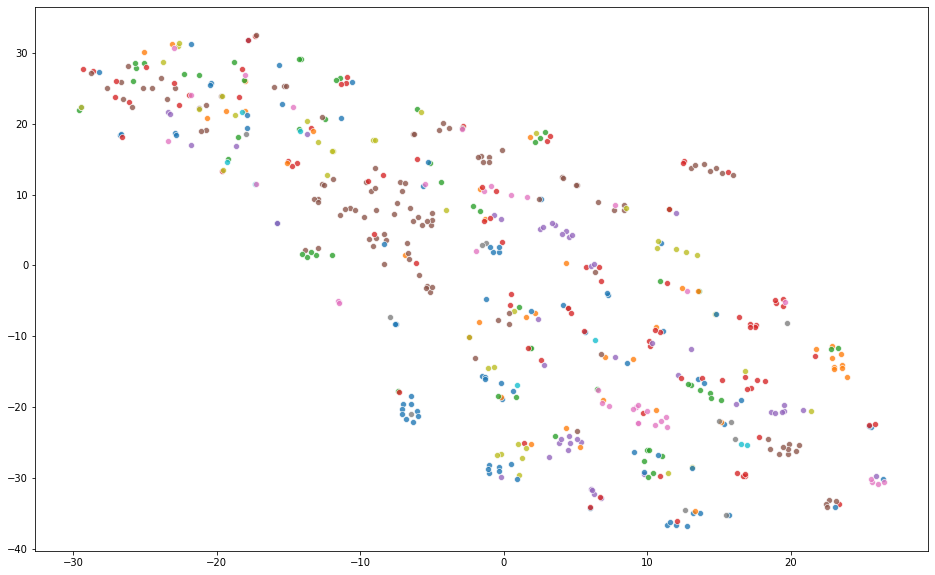

In [57]:
plt.figure(figsize=(16, 10))

for t in disease_types:
    points = np.stack(df[df['type']==t]['node2vec_proj'].values)
    sns.scatterplot(
        x=points[:, 0], y=points[:, 1],
        palette=sns.color_palette("hls", 10),
        legend='full', 
        alpha=0.8
    )
plt.show()

### GMVAE

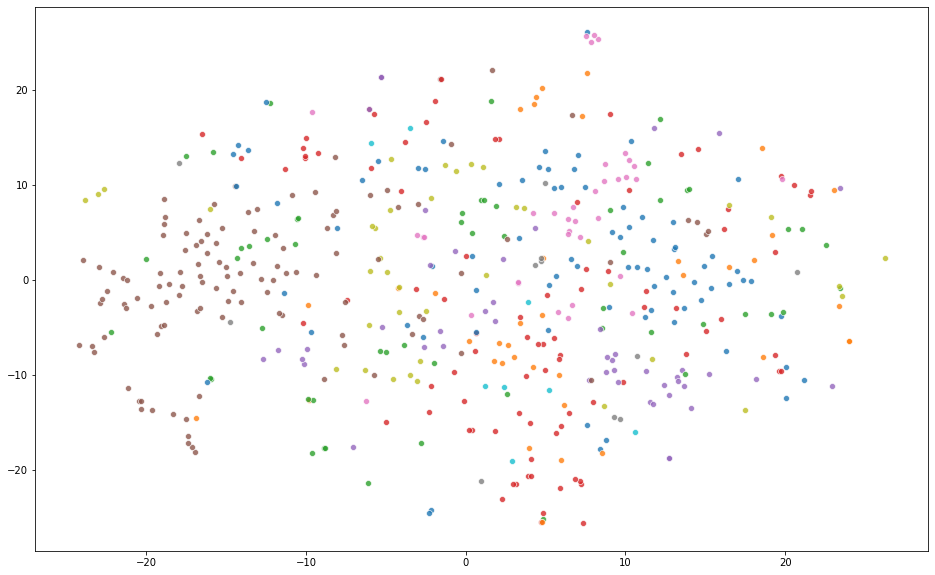

In [62]:
plt.figure(figsize=(16, 10))

for t in disease_types:
    points = np.stack(df[df['type']==t]['gmvae_proj'].values)
    sns.scatterplot(
        x=points[:, 0], y=points[:, 1],
        palette=sns.color_palette("hls", 10),
        legend='full', 
        alpha=0.8, 
    )
plt.show()